## **Project 1: Classify Images of Colon Cancer [GitHub](https://)**

**<h1>1. Load Data</h1>**

In [2]:
# function to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import libraries
import zipfile
import os
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# extract the zip file
zip_path = "/content/drive/MyDrive/ML_Assignment 2/Image_classification_data.zip"
extract_to = "/content/drive/MyDrive/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)



```

# extract the zip file
zip_path = "/content/drive/MyDrive/Image_classification_data.zip"
extract_to = "/content/drive/MyDrive/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)
```



In [8]:
# setting the root directory
root_dir="/content/drive/MyDrive/data"

# check if the directory is valid or not
os.path.isdir(root_dir)

True

In [9]:
# check the files under the root directory
os.listdir(root_dir)

['data_labels_extraData.csv',
 '__MACOSX',
 'data_labels_mainData.csv',
 'patch_images']

In [10]:
# image directory that contains the images
img_dir=root_dir+"/patch_images"
os.path.isdir(img_dir)

True

In [11]:
# printing the legth which tranlates to the number of images in the folder
len(os.listdir(img_dir))

20280

**Finding:** There are in total 20,280 images in the image folder named as patch_images

In [12]:
# file path for data_labels_extraData.csv
extra_path=root_dir+"/data_labels_extraData.csv"

# file path for data_labels_mainData.csv
main_path=root_dir+"/data_labels_mainData.csv"

**<h1>2. Data Exploration and Understanding</h1>**

In [13]:
# pandas to load the csv files
import pandas

# load the two csv files
df_extra=pandas.read_csv(extra_path)
df_main=pandas.read_csv(main_path)

In [14]:
# display the first 5 entries of df_extra
df_extra.head()

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0


In [15]:
# print the full information of df_extra
df_extra.info(), df_extra.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InstanceID   10384 non-null  int64 
 1   patientID    10384 non-null  int64 
 2   ImageName    10384 non-null  object
 3   isCancerous  10384 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 324.6+ KB


(None, (10384, 4))

In [16]:
# check the total null values in the dataframe
df_extra.isnull().sum()

,0
InstanceID,0
patientID,0
ImageName,0
isCancerous,0


**Findings**


1.   The dataframe contains 4 columns and 10,384 rows.
2.   InstanceID, patientID, isCancerous, are integer type while ImageName is an object type.
3. The dataframe does not contain any null values.



In [17]:
# display the first 5 entries of df_main
df_main.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0


In [18]:
# print the full information of df_extra
df_main.info(), df_main.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9896 entries, 0 to 9895
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   InstanceID    9896 non-null   int64 
 1   patientID     9896 non-null   int64 
 2   ImageName     9896 non-null   object
 3   cellTypeName  9896 non-null   object
 4   cellType      9896 non-null   int64 
 5   isCancerous   9896 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 464.0+ KB


(None, (9896, 6))

In [19]:
# check the total null values in the dataframe
df_main.isnull().sum()

,0
InstanceID,0
patientID,0
ImageName,0
cellTypeName,0
cellType,0
isCancerous,0


**Findings**


1.   The dataframe contains 6 columns and 9,896 rows.
2.   InstanceID, patientID, cellType, isCancerous, are integer type while ImageName and cellTypeName are object type.
3. The dataframe does not contain any null values.



**Decision:**

1.   There is no missing value(s) in the dataframes thus, there is no need to handle missing value(s)
2.   The InstanceID and the patientID are unique values pertaining to individual index/row and patient respectively and hence can be dropped since they does not offer any patterns.





In [20]:
# dropping the unique ids
df_main.drop(columns=["InstanceID","patientID"], inplace=True)
df_extra.drop(columns=["InstanceID","patientID"], inplace=True)

In [21]:
# check if the columns are dropped
df_main.head()

,ImageName,cellTypeName,cellType,isCancerous
0,22405.png,fibroblast,0,0
1,22406.png,fibroblast,0,0
2,22407.png,fibroblast,0,0
3,22408.png,fibroblast,0,0
4,22409.png,fibroblast,0,0


In [22]:
# check if the columns are dropped
df_extra.head()

,ImageName,isCancerous
0,12681.png,0
1,12682.png,0
2,12683.png,0
3,12684.png,0
4,12685.png,0


**Findings:** The df_extra contains only the ImageName and the isCancerous data while the df_main contains additional information such as cellType and cellTypeName



**<h2>Explore df_main dataframe</h2>**

In [23]:
# display four samples of data
df_main.sample(4)

,ImageName,cellTypeName,cellType,isCancerous
7200,18998.png,fibroblast,0,0
581,4187.png,inflammatory,1,0
7235,3219.png,fibroblast,0,0
2910,8836.png,epithelial,2,1


In [24]:
# count the numbers of isCancerous labels
df_main.value_counts("isCancerous")

,count
isCancerous,
0,5817
1,4079


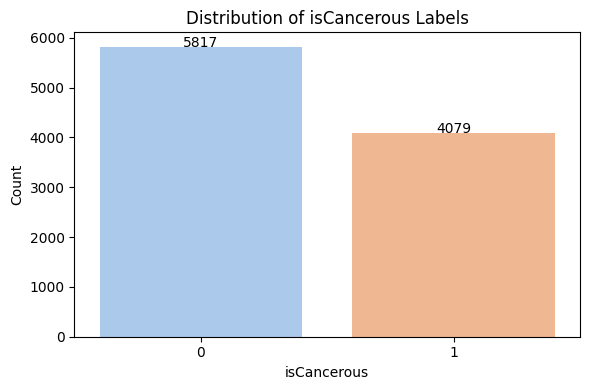

In [25]:
# visualize the above results

# importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Create figure and axis
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df_main, x="isCancerous", palette="pastel")

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center")

# Titles and labels
plt.title("Distribution of isCancerous Labels")
plt.xlabel("isCancerous")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [26]:
# count the numbers of cellTypeName
df_main.value_counts("cellTypeName")

,count
cellTypeName,
epithelial,4079
inflammatory,2543
fibroblast,1888
others,1386


In [27]:
# count the numbers of cellTypeName
df_main.value_counts("cellType")

,count
cellType,
2,4079
1,2543
0,1888
3,1386


**Findings:** The encodings are as follows;



*   [0 - fibroblast]
*   [1 - inflammatory]
*   [2 - epithelial]
*   [3 - others]



In [28]:
# find the percentage distribution of classes

# Total number of rows
total = len(df_main)

# Get value counts and percentages
counts = df_main["cellTypeName"].value_counts()
percentages = df_main["cellTypeName"].value_counts(normalize=True) * 100

# Print each value, count, and percentage
for value in counts.index:
    print(f"{value}: {counts[value]} ({percentages[value]:.2f}%)")


epithelial: 4079 (41.22%)
inflammatory: 2543 (25.70%)
fibroblast: 1888 (19.08%)
others: 1386 (14.01%)


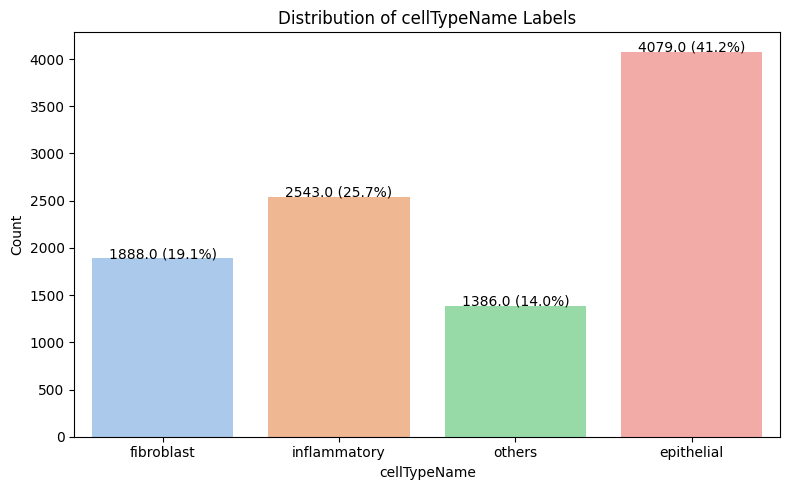

In [29]:
# Create figure and axis
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_main, x="cellTypeName", palette="pastel")

# Add count + percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    percent = (height / total) * 100
    label = f"{height} ({percent:.1f}%)"
    ax.text(p.get_x() + p.get_width() / 2., height + 1, label, ha="center")

# Titles and labels
plt.title("Distribution of cellTypeName Labels")
plt.xlabel("cellTypeName")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**Observation:** The class distribution for cellTypeName is imbalanced(although not very extreme), with the majority of instances belonging to the epithelial class (41.22%). This is followed by inflammatory (25.70%), fibroblast (19.08%), and others (14.01%).

**Implication:**This imbalance may introduce bias in training if not addressed, as models can tend to favor the majority class (epithelial) and underperform on minority classes (especially "others").

**Considerations:** To address this, the following strategies will be considered;


*   *Choose a suitable performance metrics.*
*   *Stratefied data splitting.*
* *Employing Undersampling technique*





**<h2>Understanding the distribution of cellTypes in isCancerous Labels (0 and 1)</h2>**

In [30]:
# extracting only cancerous
df_main_cancerous=df_main[df_main["isCancerous"]==1]

# extracting only non-cancerous
df_main_not_cancerous=df_main[df_main["isCancerous"]==0]

In [31]:
# extracting the value counts of cellTypes
df_main_cancerous["cellTypeName"].value_counts()

,count
cellTypeName,
epithelial,4079


In [32]:
df_main_not_cancerous["cellTypeName"].value_counts()

,count
cellTypeName,
inflammatory,2543
fibroblast,1888
others,1386


**Findings:** Notice that the epithelial is only cancerous cell type while the other three cell types are not-cancerous

**<h2>Creating datafame for Task 2: Multiclass classification of cell-type into fibroblast, inflammatory,
epithelial and others classes</h2>**



In [33]:
df_main.head()

,ImageName,cellTypeName,cellType,isCancerous
0,22405.png,fibroblast,0,0
1,22406.png,fibroblast,0,0
2,22407.png,fibroblast,0,0
3,22408.png,fibroblast,0,0
4,22409.png,fibroblast,0,0


In [34]:
# create a subset of data containing the image name and cellType
df_multiclass=df_main[["ImageName","cellType"]]
df_multiclass.head()

,ImageName,cellType
0,22405.png,0
1,22406.png,0
2,22407.png,0
3,22408.png,0
4,22409.png,0


**Note:** The cellTypeName is ignored because it has an object type while the same information or encoding is represented by cellType in integer.

In [35]:
# checking duplicates in the ImageName
df_multiclass.shape[0], df_multiclass["ImageName"].nunique()

(9896, 9896)

**Decision:** Since no image names were duplicated in the dataset thus the df_multiclass dataframe will be used for Task 2.

**<h2>Explore df_extra dataframe</h2>**

In [36]:
# displaying 5 sample data points
df_extra.sample(5)

,ImageName,isCancerous
8598,16329.png,0
1565,6281.png,0
5311,15313.png,0
8055,14798.png,0
2455,7050.png,0


In [37]:
# counting the isCancerous Labels
df_extra.value_counts("isCancerous")

,count
isCancerous,
0,7394
1,2990


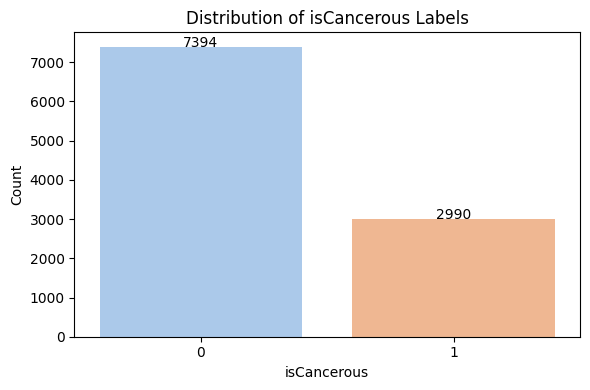

In [38]:
# visualize the above results

# importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Create figure and axis
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df_extra, x="isCancerous", palette="pastel")

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center")

# Titles and labels
plt.title("Distribution of isCancerous Labels")
plt.xlabel("isCancerous")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**Observation:** A huge class imbalance between the two labels.

However, as seen in the previous sections the df_main also have isCancerous features which is common to both the dataframes.

Now, lets try to concatenate the two dataframes to further analysis and insights.

In [39]:
# concatenating the two dataframes with common columns
df_cancer=pd.concat([df_main[["ImageName","isCancerous"]],
                     df_extra[["ImageName","isCancerous"]]])

In [40]:
# priting the dimension
df_cancer.shape

(20280, 2)

In [41]:
# display 5 samples of new concatenated data
df_cancer.sample(5)

,ImageName,isCancerous
9761,17802.png,0
7995,5655.png,1
8990,19411.png,0
2179,10257.png,0
1334,13126.png,1


In [42]:
# find the percentage distribution of classes

# Total number of rows
total = len(df_cancer)

# Get value counts and percentages
counts = df_cancer["isCancerous"].value_counts()
percentages = df_cancer["isCancerous"].value_counts(normalize=True) * 100

# Print each value, count, and percentage
for value in counts.index:
    print(f"{value}: {counts[value]} ({percentages[value]:.2f}%)")


0: 13211 (65.14%)
1: 7069 (34.86%)


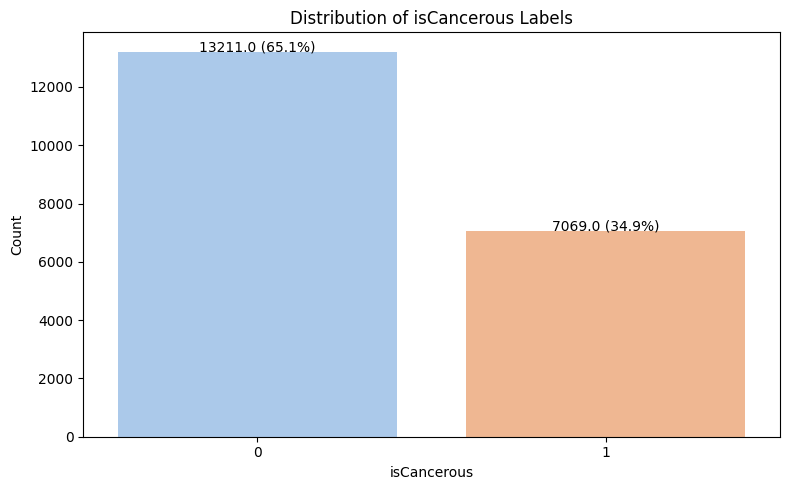

In [43]:
# visualize the above

# Create figure and axis
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_cancer, x="isCancerous", palette="pastel")

# Add count + percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    percent = (height / total) * 100
    label = f"{height} ({percent:.1f}%)"
    ax.text(p.get_x() + p.get_width() / 2., height + 1, label, ha="center")

# Titles and labels
plt.title("Distribution of isCancerous Labels")
plt.xlabel("isCancerous")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**Observation:**The dataset exhibits a moderate class imbalance, with around 65% of the samples labeled as non-cancerous (0) and 35% as cancerous (1). While this imbalance is not extreme, it is still significant enough to potentially impact the model performance.


**Implications:**


1.   Models may become biased toward the majority class (non-cancerous), leading to high overall accuracy but poor recall or precision for cancerous cases, which are often more critical to detect
2.   In medical applications, missing a cancerous case (false negative) can have serious consequences. Therefore, class imbalance should be treated with care.

**Considerations:**


1.   Stratified data splitting.
2.   Evaluate model performance using relevant performance metrics such as precision, recall, F1-score, and especially recall for the minority class.
3. Undersampling technique to handle the class imbalance






**<h2>Creating datafame for Task 1: Binary class classification of cancerous or non cancerous images</h2>**


In [44]:
# check if there is duplicates in the image names
df_cancer.shape, df_cancer["ImageName"].nunique()

((20280, 2), 20280)

In [45]:
# finalizing the data for binary class classification
df_binary=df_cancer

**Decision:** Since no image names were duplicated in the dataset thus the df_binary dataframe will be used for Task 1.

**<h2>Explore Image data</h2>**

In [46]:
# directory to the image
img_dir

'/content/drive/MyDrive/data/patch_images'

In [47]:
# the total number of images
len(os.listdir(img_dir))

20280

In [48]:
df_multiclass.shape, df_binary.shape

((9896, 2), (20280, 2))

**Observations:** The df_multiclass contains a subset of image data while the df_binary contains all the images in the image folder

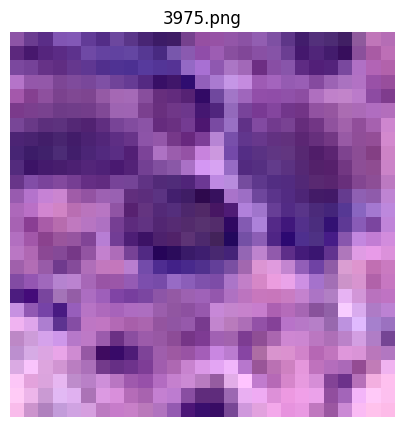

In [49]:
# display the first iimage

# import required library
from PIL import Image

# the first image
first_image=os.listdir(img_dir)[0]

img=Image.open(img_dir+"/"+first_image)

# displaying it in the plot
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title(first_image)
plt.axis('off')
plt.show()


In [50]:
# print the size of an image
img.size

(27, 27)

In [51]:
# Function to check the image dimension
from torchvision import transforms

transform = transforms.ToTensor()
tensor_img = transform(img)

print("Tensor shape:", tensor_img.shape)

Tensor shape: torch.Size([3, 27, 27])


**Finding:** The image is of size 27x27x3, which means a height and width of 27 and then three channels (RGB) OR in simple words a 27x27 coloured images

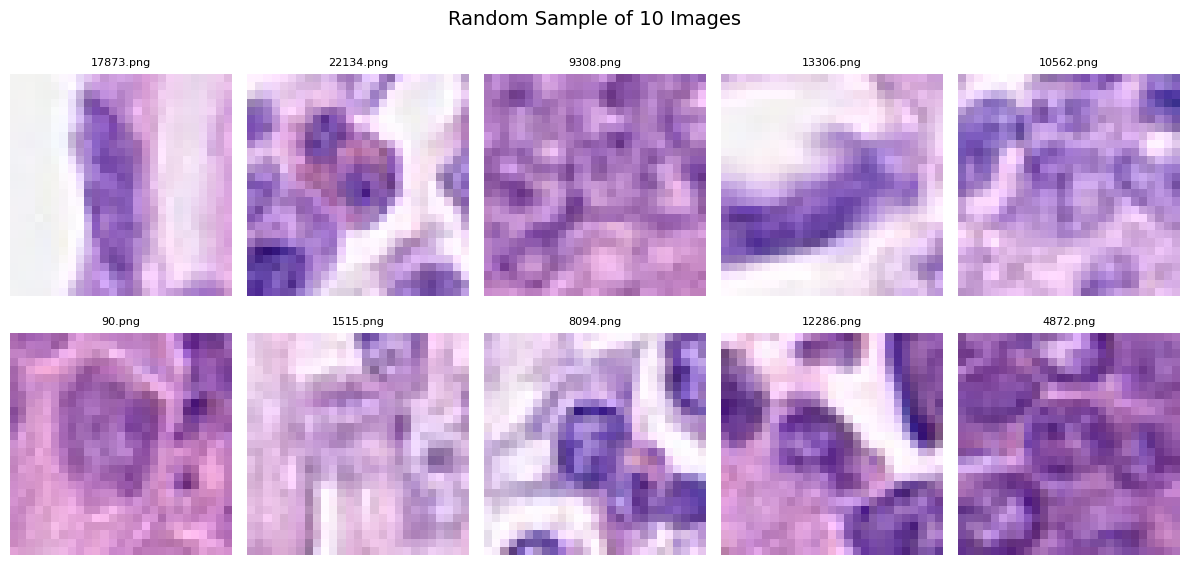

In [52]:
# randomly plot 10 images
import random

image_files = [f for f in os.listdir(img_dir)]

# Randomly select 10 images
sample_images = random.sample(image_files, 10)

# Plot images in a 2x5 grid
plt.figure(figsize=(12, 6))

for i, img_name in enumerate(sample_images):
    img_path = os.path.join(img_dir, img_name)
    img = Image.open(img_path)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(img_name, fontsize=8)
    plt.axis('off')

plt.suptitle("Random Sample of 10 Images", fontsize=14)
plt.tight_layout()
plt.show()

**<h1>3. Data Preparation</h1>**

**<h3> 3.1 Binary Classification</h3>**

In [54]:
# handling class imbalance with undersampling
 # Separate classes
df_majority = df_cancer[df_cancer['isCancerous'] == 0]
df_minority = df_cancer[df_cancer['isCancerous'] == 1]

# Undersample the majority class to match minority class count
df_majority_undersampled = df_majority.sample(n=len(df_minority), random_state=42)

# Combine them back into a balanced dataframe
df_balanced = pd.concat([df_majority_undersampled, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)

# assigning the balanced dataset as df_binary
df_binary=df_balanced

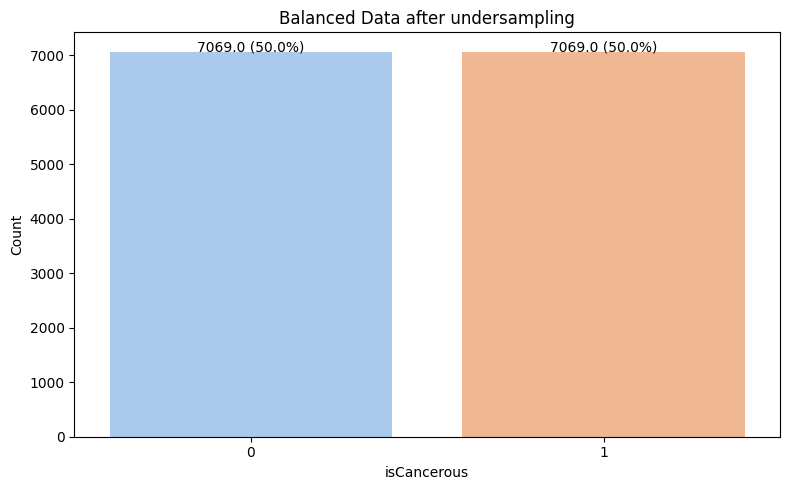

In [55]:
# visualize the above

# Create figure and axis
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_binary, x="isCancerous", palette="pastel")
total=len(df_binary)

# Add count + percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    percent = (height / total) * 100
    label = f"{height} ({percent:.1f}%)"
    ax.text(p.get_x() + p.get_width() / 2., height + 1, label, ha="center")

# Titles and labels
plt.title("Balanced Data after undersampling")
plt.xlabel("isCancerous")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**Undersampling:** The undersampling is a technique to address class imbalance by removing the samples from majority class, to make the instances equivalent to that of the minority class.


**Advantages**


1.   Undersampling reduces model bias toward the majority class by presenting a balanced class distribution during training.
2.   It is simpler and faster than oversampling techniques, as it involves removing data rather than generating new samples.
3. Helps improve recall for the minority class by giving it equal representation

**Limitations**

1.   By discarding potentially useful majority class examples, important patterns may be lost, thus leading to significant information loss.

2. The technique is not ideal for smaller dataset since it can lead to the under-representation of majority class's diversity.

**Rationale for adopting undersampling**

In this task, the dataset contained a significant imbalance between non-cancerous (isCancerous = 0) and cancerous (isCancerous = 1) cell images. The goal is to train a classifier that does not ignore the minority (cancerous) class, which is medically critical.




In [56]:
# library to split the dataset
from sklearn.model_selection import train_test_split

# For train_val + testing
train_val_df, test_df = train_test_split(
    df_binary, test_size=0.1,
    stratify=df_binary['isCancerous'],
    random_state=42)

# For train + validation
train_df, val_df = train_test_split(
    train_val_df, test_size=0.1,
    stratify=train_val_df['isCancerous'],
    random_state=42)

print(len(train_df)), print(len(val_df)), print(len(test_df))

11451
1273
1414


(None, None, None)

**Visualizing the data splits**

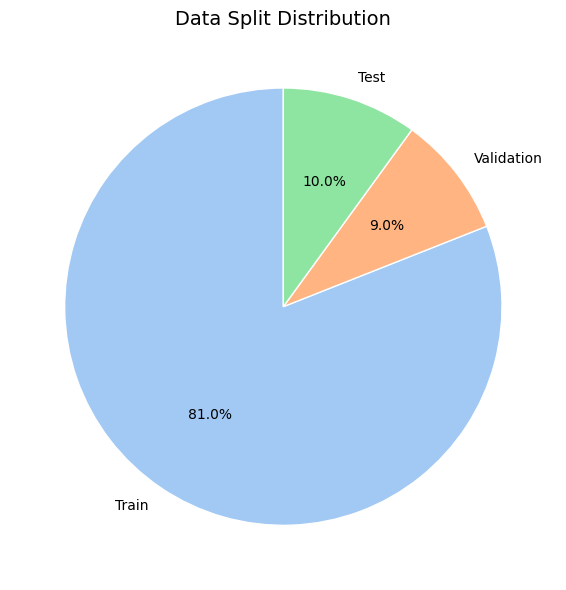

In [57]:
# Counts for each split
split_counts = {
    'Train': len(train_df),
    'Validation': len(val_df),
    'Test': len(test_df)
}

# Data for plotting
labels = list(split_counts.keys())
sizes = list(split_counts.values())
colors = sns.color_palette("pastel")[0:3]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title("Data Split Distribution", fontsize=14)
plt.tight_layout()
plt.show()


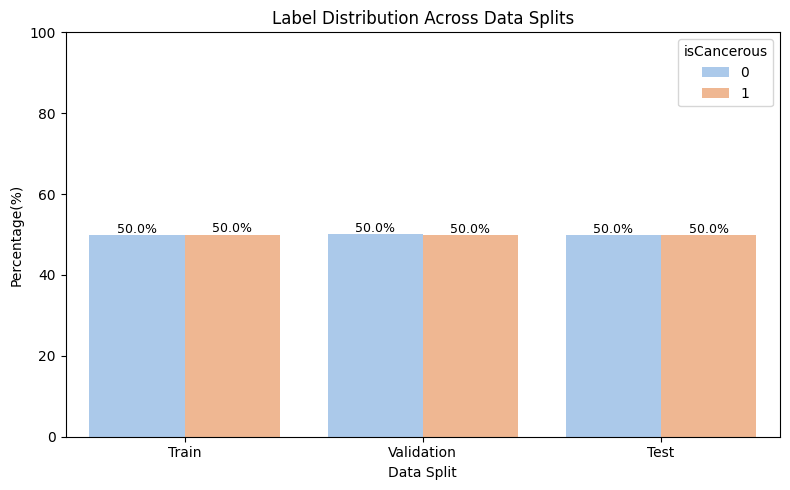

In [58]:
#  Count class distributions in each split
train_dist = train_df['isCancerous'].value_counts(normalize=True) * 100
val_dist = val_df['isCancerous'].value_counts(normalize=True) * 100
test_dist = test_df['isCancerous'].value_counts(normalize=True) * 100

# Combine into one DataFrame for plotting
dist_df = pd.DataFrame({
    'Train': train_dist,
    'Validation': val_dist,
    'Test': test_dist
}).T

# Reformating
dist_df = dist_df.reset_index().melt(id_vars='index',
                                     var_name='Label',
                                     value_name='Percentage')

dist_df.rename(columns={'index': 'Split'}, inplace=True)

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=dist_df, x='Split', y='Percentage',
                 hue='Label', palette='pastel'
                 )

# Adding percentage labels on each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0.1:
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 0.5, f'{height:.1f}%',
                ha='center', fontsize=9)


plt.title("Label Distribution Across Data Splits")
plt.ylabel("Percentage(%)")
plt.xlabel("Data Split")
plt.ylim(0, 100)
plt.legend(title='isCancerous')
plt.tight_layout()
plt.show()

**Description**



*   The entire dataset is splitted into three different partitions (Training data, Validation data, and Testing data)
*   First the data is split into two partitions (train_val_df: dataframe which will contain the dataset for both the training and validation, and test_df which is the dataframe that contains the testing data). The partitions are 90% train_val_df and then 10% testing_df.
* The train_val_df which is the dataset for both the training and validation is further split into two partitions which are 90% training and 10% validation.

* **Note**:The argument stratify based on the isCancerous is used. This is so because, since the isCancerous contains two labels (0 and 1), and to ensure that the two labels are distributed in the splits (train/val/test) mirroring the distribution in the full dataset. In all the three splits the two labels constitues 50% each.

* By doing so it address the problem of:

        1.   Overrepresentation and underrepresentation of one class in the partitions.
        2.   Entirely missing one of a class in the smaller splits and addressing the problem of data leakage ().

In [59]:
# create a custom dataset

from torch.utils.data import Dataset

class ImageDatasetFromDF(Dataset):
    def __init__(self, dataframe, img_dir, label_col, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.img_dir = img_dir
        self.label_col = label_col
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = self.df.loc[idx, 'ImageName']
        label = self.df.loc[idx, self.label_col]
        img_path = os.path.join(self.img_dir, img_name)

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, label


In [60]:

# creating a data transofrmation and normalizations
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize((27, 27)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ToTensor()
])

val_test_transform = transforms.Compose([
    transforms.Resize((27, 27)),
    transforms.ToTensor()
])


**Image Augmentation:** The image augmentation is applied only to the training images (except Resize). This is so as to create a diverse dataset for robust model training.

| **Transformation**           | **Purpose**                                                                  |
| ---------------------------- | ---------------------------------------------------------------------------- |
| `Resize((27, 27))`           | The original size of 27x27 is retained and is made consistent to all images and to match model input size |
| `RandomHorizontalFlip()`     | The images are randomly flipped horizontally with 50% (default parameter) propability             |
| `RandomVerticalFlip()`       | The images are randomly flipped vertically with 50% (default parameter) propability        |
| `RandomRotation(degrees=15)` | The images are rotated randomly within ±15 degrees to add angular variation       |


<br>

**Image Normalization:** This is applied across all the data partitions.

| **Transformation**                                     | **Purpose**                                                                              |
| ------------------------------------------------------ | ---------------------------------------------------------------------------------------- |
| `ToTensor()`                                           | Converts image to a PyTorch tensor and scales pixel values from \[0, 255] to \[0.0, 1.0] |

<br>





**Training Image Augmentation:**Data augmentation is applied only during training to artificially increase dataset diversity and improve the model's ability to generalize. Techniques like random flipping, rotation, and cropping introduce variations that mimic real-world differences in image orientation or appearance. This helps prevent overfitting by exposing the model to a wider range of examples, allowing it to learn robust and invariant features rather than memorizing specific patterns.


**Normalization to all Images:**On the other hand, resizing and normalization are applied consistently across training, validation, and test sets to maintain uniformity in input dimensions and pixel value distributions.


In [61]:
# iimporting libraries to create dataset and dataloaders for model training

from torch.utils.data import DataLoader

# Create datasets

# training dataset
train_dataset = ImageDatasetFromDF(train_df, img_dir,
                                   label_col='isCancerous',
                                   transform=train_transform)

# validation dataset
val_dataset = ImageDatasetFromDF(val_df, img_dir,
                                 label_col='isCancerous',
                                 transform=val_test_transform)

# testing dataset
test_dataset = ImageDatasetFromDF(test_df, img_dir,
                                  label_col='isCancerous',
                                  transform=val_test_transform)


**Dataset:**:The dataset  was created using a custom ImageDatasetFromDF class, which loads images from a common directory based on filenames and labels provided in the split DataFrames (train_df, val_df, and test_df).

Each image is associated with a binary label under the column isCancerous. For the training set, train_transform is performed to enhance model generalization. The validation and test datasets will undergo val_test_transform to ensure consistent evaluation.

In [62]:
# Create dataloaders

# training dataloader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# validation dataloader
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# testing dataloader
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

**Dataloaders:**: The training dataloader is configured with a batch size of 32 and shuffle=True to ensure that the model sees data in a different order each epoch, improving learning.

For validation and testing, shuffling is disabled to maintain a fixed evaluation order with the same batch size of 32.

In [63]:
len(train_loader), len(val_loader), len(test_loader)

(358, 40, 45)

**Dataloader Sizes**


*   Train Loader: The training data contains 358 batches of size 32.
*   Valid Loader: The validation data contains 40 batches of size 32.
* Test Loader: The testing data contains 45 batches of size 32.



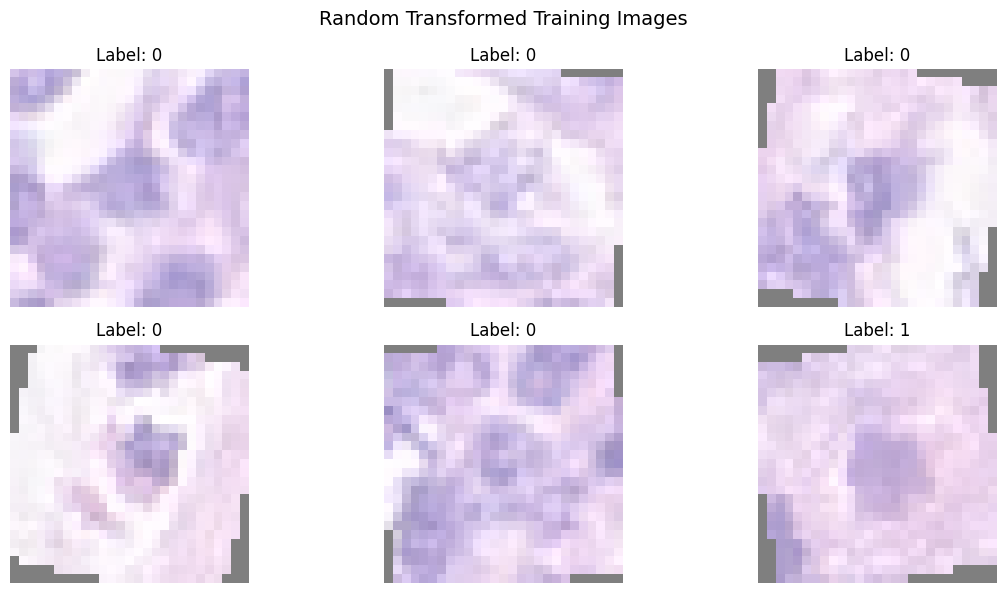

In [ ]:
# Number of images to display
num_images = 6

random.seed(32)

# Get random indices
indices = random.sample(range(len(train_dataset)), num_images)

# Create plot
plt.figure(figsize=(12, 6))

for i, idx in enumerate(indices):
    image, label = train_dataset[idx]  # This applies the transform

    # Undo normalization if you used transforms.Normalize
    image = image * 0.5 + 0.5

    # Convert tensor to numpy and move channel to last dimension
    np_img = image.permute(1, 2, 0).numpy()

    plt.subplot(2, 3, i + 1)
    plt.imshow(np_img)
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.suptitle("Random Transformed Training Images", fontsize=14)
plt.tight_layout()
plt.show()

**Figure Description:** The above figure shows the list of images (6 random images), from the training dataset which has undergone training tranformation

**<h1>4. Model Building</h1>**

**<h3>4.1 Baseline Model-Binary Classification</h3>**

In [64]:
# libraries for model building building and tracking metrics
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np


In [ ]:
class BaseCNN(nn.Module):
    def __init__(self):
        super(BaseCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 36, kernel_size=4)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(36, 48, kernel_size=3)
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(48 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

**Base Model Selction - CNN (Convolutional Neural Network)**
1. Suitability for Image Data: CNNs are explicitly designed for spatially structured data, such as images. CNNs leverage convolutional filters to extract local patterns (edges, textures, shapes), which is critical for cell detection and classification in histopathology images.


2. Parameter Efficiency: CNNs share weights across pixels using filters, making them computationally efficient


**Limitations of Other Methods:**

1. ANNs require flattened input and can't capture spatial patterns effectively.
2. SVMs and KNNs (Traditional ML models) struggle with high-dimensional image data and scale poorly with large datasets.
3. Transfer learning using pretrained CNNs is not used here as per assignment guidelines.

**<h3> Base Model Training and Validation</h3>**

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BaseCNN().to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses, val_losses = [], []

EPOCHS = 30
for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch+1}/{EPOCHS}")

    # --- Training ---
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.float().unsqueeze(1).to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)
    print(f"Train Loss: {epoch_train_loss:.4f}")

    # --- Validation ---
    model.eval()
    val_loss = 0.0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.float().unsqueeze(1).to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)

            probs = torch.sigmoid(outputs)
            preds = (probs >= 0.5).float()

            all_preds.extend(probs.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    epoch_val_loss = val_loss / len(val_loader.dataset)
    val_losses.append(epoch_val_loss)

    # Convert to binary
    y_true = [int(y[0]) for y in all_labels]
    y_pred = [int(p[0] >= 0.5) for p in all_preds]

    acc = np.mean(np.array(y_true) == np.array(y_pred)) * 100
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_true, all_preds)

    print(f"Val Loss: {epoch_val_loss:.4f} | Acc: {acc:.2f}% | Precision: {precision:.3f} | Recall: {recall:.3f} | F1: {f1:.3f} | ROC AUC: {roc_auc:.3f}")



Epoch 1/30
Train Loss: 0.4680
Val Loss: 0.3570 | Acc: 85.39% | Precision: 0.806 | Recall: 0.932 | F1: 0.864 | ROC AUC: 0.929

Epoch 2/30
Train Loss: 0.3768
Val Loss: 0.3635 | Acc: 84.37% | Precision: 0.796 | Recall: 0.925 | F1: 0.855 | ROC AUC: 0.929

Epoch 3/30
Train Loss: 0.3591
Val Loss: 0.3280 | Acc: 86.10% | Precision: 0.818 | Recall: 0.928 | F1: 0.870 | ROC AUC: 0.941

Epoch 4/30
Train Loss: 0.3391
Val Loss: 0.3037 | Acc: 87.75% | Precision: 0.857 | Recall: 0.906 | F1: 0.881 | ROC AUC: 0.944

Epoch 5/30
Train Loss: 0.3385
Val Loss: 0.3263 | Acc: 86.88% | Precision: 0.827 | Recall: 0.932 | F1: 0.877 | ROC AUC: 0.941

Epoch 6/30
Train Loss: 0.3322
Val Loss: 0.3039 | Acc: 87.27% | Precision: 0.853 | Recall: 0.901 | F1: 0.876 | ROC AUC: 0.945

Epoch 7/30
Train Loss: 0.3213
Val Loss: 0.2972 | Acc: 87.90% | Precision: 0.904 | Recall: 0.847 | F1: 0.875 | ROC AUC: 0.948

Epoch 8/30
Train Loss: 0.3197
Val Loss: 0.3130 | Acc: 87.04% | Precision: 0.840 | Recall: 0.915 | F1: 0.876 | ROC AUC

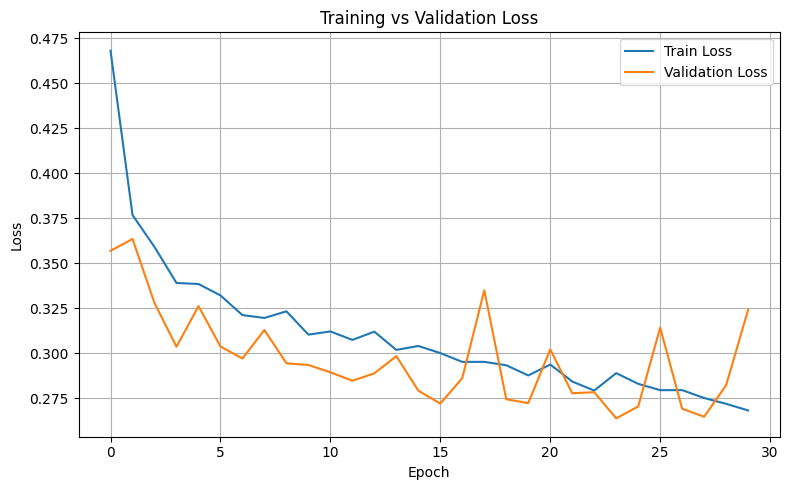

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Model Fitting**

1. **No signs of underfitting**: Both training and validation loss start high and decline, which means the model is capable of learning and generalizing to some extent.

2. **Minor signs of overfitting**: After epoch 15, the validation loss becomes more volatile, with several upward spikes despite training loss continuing to decrease. This indicates that the model may be starting to overfit, learning noise or specific patterns in the training data that don't generalize well to unseen validation samples.

The overall gap between training and validation loss remains small and stable, suggesting that overfitting is controlled, likely due to the inclusion of dropout and weight decay regularization

In [ ]:
model.eval()
test_preds, test_labels = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.float().unsqueeze(1).to(device)

        outputs = model(images)
        probs = torch.sigmoid(outputs)
        preds = (probs >= 0.5).float()

        test_preds.extend(probs.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

y_true = [int(y[0]) for y in test_labels]
y_pred = [int(p[0] >= 0.5) for p in test_preds]

print("\nClassification Report on Test Set")
print(classification_report(y_true, y_pred, digits=3))
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print(f"ROC AUC: {roc_auc_score(y_true, test_preds):.3f}")



Classification Report on Test Set
              precision    recall  f1-score   support

           0      0.903     0.789     0.842       707
           1      0.813     0.915     0.861       707

    accuracy                          0.852      1414
   macro avg      0.858     0.852     0.852      1414
weighted avg      0.858     0.852     0.852      1414

Confusion Matrix:
[[558 149]
 [ 60 647]]
ROC AUC: 0.939


**Choice of Metrics**

***Precision = TP / (TP + FP)***

Precision tells us how many of the predicted positive cases were actually correct. In medical diagnosis, high precision reduces false positives, meaning fewer healthy individuals are wrongly flagged as sick.


***Recall = TP / (TP + FN)***

Recall measures the model's ability to correctly identify all actual positive cases. This is crucial in medical applications, where missing a cancerous case (false negative) can have serious consequences.


***Macro F1 = average of F1-scores across all classes***

Macro F1 treats all classes equally, regardless of their size. It provides a balanced view of performance across both the majority and minority classes. This is ideal when each class is equally important, as is the case in binary cancer classification where both false positives and false negatives have consequences.

In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 23.9 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import optuna
from sklearn.metrics import f1_score

# Tunable CNN Model
class TunableCNN(nn.Module):
    def __init__(self, input_channels=3, base_channels=36, growth_rate=1.5,
                 n_conv_layers=2, n_fc_layers=1, dropout_rate=0.5, img_size=27):
        super(TunableCNN, self).__init__()
        self.features = nn.Sequential()
        in_channels = input_channels
        out_channels = base_channels

        for i in range(n_conv_layers):
            self.features.add_module(f"conv{i+1}", nn.Conv2d(in_channels, int(out_channels), kernel_size=3, padding=1))
            self.features.add_module(f"relu{i+1}", nn.ReLU())
            self.features.add_module(f"pool{i+1}", nn.MaxPool2d(2))
            in_channels = int(out_channels)
            out_channels *= growth_rate

        conv_output_size = img_size // (2 ** n_conv_layers)
        conv_feature_size = int(in_channels) * conv_output_size * conv_output_size

        self.classifier = nn.Sequential()
        self.classifier.add_module("fc1", nn.Linear(conv_feature_size, 512))
        self.classifier.add_module("dropout", nn.Dropout(dropout_rate))
        self.classifier.add_module("relu_fc", nn.ReLU())

        if n_fc_layers == 2:
            self.classifier.add_module("fc2", nn.Linear(512, 256))
            self.classifier.add_module("relu_fc2", nn.ReLU())
            self.classifier.add_module("dropout2", nn.Dropout(dropout_rate))
            self.classifier.add_module("fc3", nn.Linear(256, 1))
        else:
            self.classifier.add_module("fc2", nn.Linear(512, 1))

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Training & Validation
def train_and_return_f1(model, optimizer, criterion, train_loader, val_loader, device, epochs=5):
    model.to(device)
    for epoch in range(epochs):
        model.train()
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.float().unsqueeze(1).to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.float().unsqueeze(1).to(device)

            outputs = model(images)
            probs = torch.sigmoid(outputs)
            preds = (probs >= 0.5).float()

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    y_true = [int(y[0]) for y in all_labels]
    y_pred = [int(p[0]) for p in all_preds]

    return f1_score(y_true, y_pred, average='macro')

# Optuna Objective
def objective(trial):
    model = TunableCNN(
        base_channels=trial.suggest_categorical("base_channels", [32, 36, 48]),
        growth_rate=trial.suggest_categorical("growth_rate", [1.5, 2]),
        n_conv_layers=trial.suggest_int("n_conv_layers", 2, 4),
        n_fc_layers=trial.suggest_int("n_fc_layers", 1, 2),
        dropout_rate=trial.suggest_float("dropout_rate", 0.3, 0.6),
        img_size=27
    )

    optimizer = torch.optim.Adam(
        model.parameters(),
        lr=trial.suggest_float("lr", 1e-5, 1e-3, log=True)
    )

    criterion = nn.BCEWithLogitsLoss()

    return train_and_return_f1(model, optimizer, criterion, train_loader, val_loader, device)

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)

# Best Hyperparameters
print("Best Trial:")
print(f"  F1-score: {study.best_value:.4f}")
for key, value in study.best_trial.params.items():
    print(f"  {key}: {value}")


[I 2025-05-17 09:39:22,218] A new study created in memory with name: no-name-90e44b6a-d5b6-479b-b771-f515b5821b72
[I 2025-05-17 09:42:19,512] Trial 0 finished with value: 0.8954911746278653 and parameters: {'base_channels': 36, 'growth_rate': 2, 'n_conv_layers': 4, 'n_fc_layers': 1, 'dropout_rate': 0.4090479951650269, 'lr': 0.00037047441894600915}. Best is trial 0 with value: 0.8954911746278653.
[I 2025-05-17 09:45:09,383] Trial 1 finished with value: 0.8196830971194449 and parameters: {'base_channels': 48, 'growth_rate': 2, 'n_conv_layers': 3, 'n_fc_layers': 2, 'dropout_rate': 0.509248704087249, 'lr': 1.9725858854018247e-05}. Best is trial 0 with value: 0.8954911746278653.
[I 2025-05-17 09:47:58,975] Trial 2 finished with value: 0.8931656842708056 and parameters: {'base_channels': 36, 'growth_rate': 2, 'n_conv_layers': 4, 'n_fc_layers': 1, 'dropout_rate': 0.526892846118366, 'lr': 0.0003739665466542855}. Best is trial 0 with value: 0.8954911746278653.
[I 2025-05-17 09:50:47,583] Trial 

Best Trial:
  F1-score: 0.8963
  base_channels: 36
  growth_rate: 2
  n_conv_layers: 4
  n_fc_layers: 1
  dropout_rate: 0.35650520434034083
  lr: 0.0009516470445130213


**Hyperparameter Tuning**

The hyperparameter tuning process was conducted using Optuna, with the goal of maximizing the macro F1-score, which takes into account both the precision and recall.

***(F1-Score=2xPrecisionxRecall/(Recall+Precision))***

The best-performing parameters yielded a validation F1-score of 0.8963, and consisted of the following parameters:

1. **Base Channels (36)**

2. **Growth Rate (2)**

3. **Number of Convolutional Layers (4)**

4. **Number of Fully Connected Layers (1)**

5. **Dropout Rate (0.3565)**
6. **Learning Rate (0.00095)**

In [ ]:
# Now combine the training and the validation dataset for final fine-tuned model
new_train_df=pd.concat([train_df,val_df])

# new training dataset from the custom ImageDatasetFromDF class
new_train_dataset = ImageDatasetFromDF(new_train_df, img_dir,
                                   label_col='isCancerous',
                                   transform=train_transform)


# New training loader
new_train_loader = DataLoader(new_train_dataset, batch_size=32, shuffle=True)
print(f"Old Training Loader Length:{len(train_loader)} \nNew Training Loader Length:{len(new_train_loader)}")


Old Training Loader Length:358 
New Training Loader Length:398


**Final Training Data**

After identifying the best hyperparameters through tuning with the training and validation datasets, the final model was retrained using a combined dataset formed by merging both the original training and validation sets.

**Rationale**

1. **Utilizes More Data:** Combining the training and validation sets increases the size of the training data, which allows the final model to learn from a wider variety of examples.

2. **Improves Generalization:** By training on both previously seen training and validation data, the model becomes less biased toward the initial training distribution and more robust to new, unseen data.

3. **Final Model Stability:** Since hyperparameters are already optimized and the validation set has served its purpose, it is safe to use all labeled data for final training without risking overfitting to the test set.

4. **Fair Final Evaluation:** The test set is kept untouched throughout, allowing an unbiased final evaluation of the model's performance. This ensures the reported results reflect real-world generalization

In [ ]:
class TunedCNN(nn.Module):
    def __init__(self):
        super(TunedCNN, self).__init__()
        base_channels = 36
        growth_rate = 2
        n_conv_layers = 4
        dropout_rate = 0.35650520434034083
        n_fc_layers = 1
        img_size = 27

        self.features = nn.Sequential()
        in_channels = 3
        out_channels = base_channels

        for i in range(n_conv_layers):
            self.features.add_module(f"conv{i+1}", nn.Conv2d(in_channels, int(out_channels), kernel_size=3, padding=1))
            self.features.add_module(f"relu{i+1}", nn.ReLU())
            self.features.add_module(f"pool{i+1}", nn.MaxPool2d(2))
            in_channels = int(out_channels)
            out_channels *= growth_rate

        conv_output_size = img_size // (2 ** n_conv_layers)
        conv_feature_size = int(in_channels) * conv_output_size * conv_output_size

        self.classifier = nn.Sequential(
            nn.Linear(conv_feature_size, 512),
            nn.Dropout(dropout_rate),
            nn.ReLU(),
            nn.Linear(512, 1)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


**<h3>Comparative Analysis of the Baseline and Fine-Tuned Model Configurations</h3>**

In [ ]:
base_model=BaseCNN()
print(base_model)

BaseCNN(
  (conv1): Conv2d(3, 36, kernel_size=(4, 4), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(36, 48, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1200, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=1, bias=True)
)


**Baseline Model Configuration (BaseCNN)**

The baseline architecture consisted of:

1. 2 convolutional layers:
  * Conv1: 3 input channels → 36 output channels, kernel size 4
  * Conv2: 36 → 48 channels, kernel size 3.

2. 2 max pooling layers: each reducing spatial resolution by half
Fully connected layers:
  * FC1: 1200 → 512 neurons
  * FC2: 512 → 1 output neuron (binary classification)

3. No dropout or batch normalization used.

In [ ]:
model_tuned=TunedCNN()

print(model_tuned)

TunedCNN(
  (features): Sequential(
    (conv1): Conv2d(3, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu1): ReLU()
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(36, 72, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu2): ReLU()
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv3): Conv2d(72, 144, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu3): ReLU()
    (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv4): Conv2d(144, 288, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu4): ReLU()
    (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=288, out_features=512, bias=True)
    (1): Dropout(p=0.35650520434034083, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=1, 

**Fine-Tuned Model Configuration (TunedCNN)**

The fine-tuned architecture, derived from Optuna tuning, significantly enhanced the baseline design:

1. 4 convolutional layers with progressive growth in channel depth:
  * Conv1: 3 → 36, Conv2: 36 → 72, Conv3: 72 → 144, Conv4: 144 → 288
  * Each uses kernel size 3 with padding=1 (to preserve spatial dimensions)

2. Max pooling after each conv layer to reduce resolution and increase receptive field.

3. Fully connected head:
  * Flattened feature maps passed to FC layer: 288 → 512 → 1
  * Includes dropout (p = 0.3565) for regularization
  * Growth rate of 2: Each conv layer doubles the number of output channels.
  * Learning rate tuned to 0.00095
  * Weight decay (L2 regularization) used to mitigate overfitting during training

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TunedCNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0009516470445130213)
criterion = nn.BCEWithLogitsLoss()

train_losses = []

EPOCHS = 30
for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch+1}/{EPOCHS}")

    # --- Training ---
    model.train()
    running_loss = 0.0
    for images, labels in new_train_loader:
        images = images.to(device)
        labels = labels.float().unsqueeze(1).to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_train_loss = running_loss / len(new_train_loader.dataset)
    train_losses.append(epoch_train_loss)
    print(f"Train Loss: {epoch_train_loss:.4f}")



Epoch 1/30
Train Loss: 0.4351

Epoch 2/30
Train Loss: 0.3398

Epoch 3/30
Train Loss: 0.3128

Epoch 4/30
Train Loss: 0.3110

Epoch 5/30
Train Loss: 0.2989

Epoch 6/30
Train Loss: 0.2940

Epoch 7/30
Train Loss: 0.2884

Epoch 8/30
Train Loss: 0.2860

Epoch 9/30
Train Loss: 0.2845

Epoch 10/30
Train Loss: 0.2762

Epoch 11/30
Train Loss: 0.2715

Epoch 12/30
Train Loss: 0.2703

Epoch 13/30
Train Loss: 0.2761

Epoch 14/30
Train Loss: 0.2718

Epoch 15/30
Train Loss: 0.2591

Epoch 16/30
Train Loss: 0.2645

Epoch 17/30
Train Loss: 0.2522

Epoch 18/30
Train Loss: 0.2577

Epoch 19/30
Train Loss: 0.2511

Epoch 20/30
Train Loss: 0.2502

Epoch 21/30
Train Loss: 0.2419

Epoch 22/30
Train Loss: 0.2455

Epoch 23/30
Train Loss: 0.2377

Epoch 24/30
Train Loss: 0.2363

Epoch 25/30
Train Loss: 0.2368

Epoch 26/30
Train Loss: 0.2328

Epoch 27/30
Train Loss: 0.2338

Epoch 28/30
Train Loss: 0.2319

Epoch 29/30
Train Loss: 0.2286

Epoch 30/30
Train Loss: 0.2307


In [ ]:
model.eval()
test_preds, test_labels = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.float().unsqueeze(1).to(device)

        outputs = model(images)
        probs = torch.sigmoid(outputs)
        preds = (probs >= 0.5).float()

        test_preds.extend(probs.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

y_true = [int(y[0]) for y in test_labels]
y_pred = [int(p[0] >= 0.5) for p in test_preds]

print("\nClassification Report on Test Set")
print(classification_report(y_true, y_pred, digits=3))
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print(f"ROC AUC: {roc_auc_score(y_true, test_preds):.3f}")



Classification Report on Test Set
              precision    recall  f1-score   support

           0      0.877     0.914     0.895       707
           1      0.910     0.871     0.890       707

    accuracy                          0.893      1414
   macro avg      0.893     0.893     0.892      1414
weighted avg      0.893     0.893     0.892      1414

Confusion Matrix:
[[646  61]
 [ 91 616]]
ROC AUC: 0.951



**Comparison of Baseline and Fine-Tuned Model Performance on Test Set**


| Metric           | Baseline Model | Fine-Tuned Model |
|------------------|----------------|------------------|
| Accuracy         | 85.2%          | 89.3%            |
| Macro F1-score   | 0.852          | 0.892            |
| ROC AUC          | 0.939          | 0.951            |
| Precision (Class 0) | 0.903       | 0.877            |
| Recall (Class 0) | 0.789          | 0.914            |
| Precision (Class 1) | 0.813       | 0.910            |
| Recall (Class 1) | 0.915          | 0.871            |
| F1-score (Class 1) | 0.861        | 0.890            |


**Confusion Matrix of Baseline Mode**l

|                | Predicted 0 | Predicted 1 |
|----------------|-------------|-------------|
| **Actual 0**   |     558     |     149     |
| **Actual 1**   |     60      |     647     |

**Confusion Matrix of Fine-Tuned Model**

|                | Predicted 0 | Predicted 1 |
|----------------|-------------|-------------|
| **Actual 0**   |     646     |     61      |
| **Actual 1**   |     91      |     616     |


**Summary**

The fine-tuned model clearly outperforms the baseline model across most key evaluation metrics. It achieves higher accuracy and ROC AUC, reflecting improved overall classification performance and better class separation. Precision for class 1 (cancerous) improves substantially, indicating fewer false positives, while recall for class 0 (non-cancerous) also sees a notable boost, meaning fewer healthy cases are missed.

Although there is a small trade-off in recall for class 1, the overall F1-score increases, demonstrating a more balanced and robust model after hyperparameter tuning.



The confusion matrix of the baseline model shows a high number of false positives (149) and fewer false negatives (60). In contrast, the fine-tuned model significantly reduces false positives to 61 but has a slightly higher number of false negatives (91). This indicates a trade-off: the fine-tuned model is more conservative when predicting the positive class, resulting in fewer incorrect alarms (i.e., better precision), but at the cost of missing slightly more true positives (i.e., lower recall).






**<h1>5. Data Preparation</h1>**


**<h3>5.1 Multiclass Classification**

In [65]:
df_multiclass.sample(4)

,ImageName,cellType
3928,9349.png,2
3338,8620.png,2
2287,2995.png,0
3072,8340.png,2


In [66]:
# find the percentage distribution of classes

# Total number of rows
total = len(df_multiclass)

# Get value counts and percentages
counts = df_multiclass["cellType"].value_counts()
percentages = df_multiclass["cellType"].value_counts(normalize=True) * 100

# Print each value, count, and percentage
for value in counts.index:
    print(f"{value}: {counts[value]} ({percentages[value]:.2f}%)")




2: 4079 (41.22%)
1: 2543 (25.70%)
0: 1888 (19.08%)
3: 1386 (14.01%)


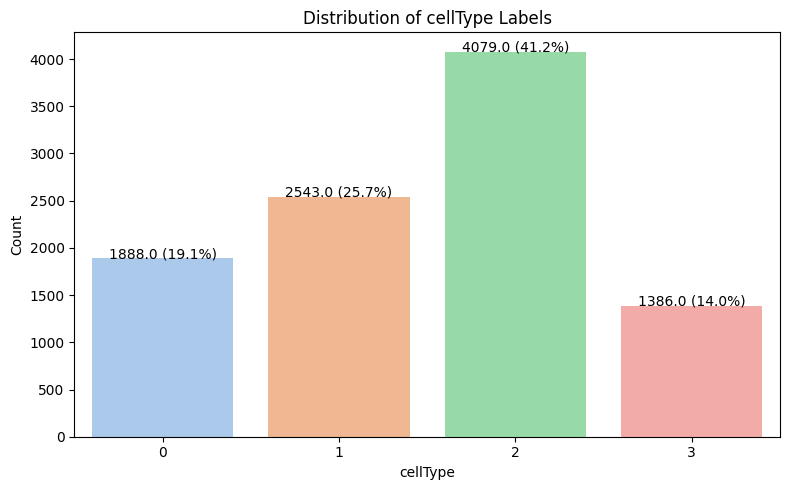

In [67]:
# Create figure and axis
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_multiclass, x="cellType", palette="pastel")

# Add count + percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    percent = (height / total) * 100
    label = f"{height} ({percent:.1f}%)"
    ax.text(p.get_x() + p.get_width() / 2., height + 1, label, ha="center")

# Titles and labels
plt.title("Distribution of cellType Labels")
plt.xlabel("cellType")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**Class Imbalance and Its Implication**

The bar chart above shows a clear class imbalance in the cellType labels:

1. Class 2 (41.2%) is the dominant class, comprising nearly half of the dataset.
2. Class 1 (25.7%) and Class 0 (19.1%) are moderate in frequency.
3. Class 3 is the minority class, representing only 14.0% of the total samples.


This imbalance can negatively affect a machine learning model in several ways:

1. Biased Learning: The model is likely to become biased towards the majority class (Class 2), potentially learning to predict it more often regardless of input quality.
2. Poor Generalization for Minority Classes: Classes with fewer samples (especially Class 3) may be underrepresented in the learning process, leading to lower recall and F1-score for these categories.

3. Misleading Accuracy: Overall accuracy can appear high while performance on minority classes is poor — which is especially problematic in medical or high-risk domains

In [68]:
# Handling class imbalance with undersampling

print("Original class distribution:")
print(df_multiclass['cellType'].value_counts())

# Determine the minority class count
min_count = df_multiclass['cellType'].value_counts().min()

# Undersample each class to match the minority class
df_balanced = (
    df_multiclass
    .groupby('cellType')
    .apply(lambda x: x.sample(n=min_count, random_state=42))
    .reset_index(drop=True)
)

# Verify new distribution
print("\nBalanced class distribution:")
print(df_balanced['cellType'].value_counts())

Original class distribution:
cellType
2    4079
1    2543
0    1888
3    1386
Name: count, dtype: int64

Balanced class distribution:
cellType
0    1386
1    1386
2    1386
3    1386
Name: count, dtype: int64


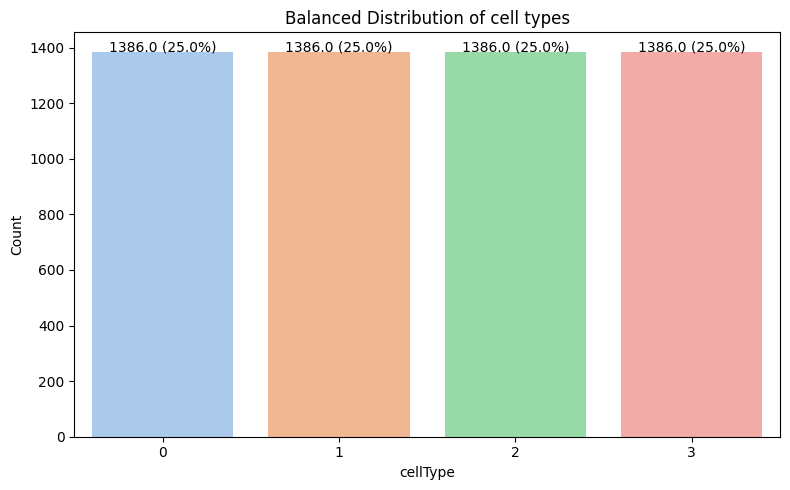

In [69]:
# find the percentage distribution of classes

# Total number of rows
total = len(df_balanced)

# Get value counts and percentages
counts = df_balanced["cellType"].value_counts()
percentages = df_balanced["cellType"].value_counts(normalize=True) * 100

# Create figure and axis
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_balanced, x="cellType", palette="pastel")

# Add count + percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    percent = (height / total) * 100
    label = f"{height} ({percent:.1f}%)"
    ax.text(p.get_x() + p.get_width() / 2., height + 1, label, ha="center")

# Titles and labels
plt.title("Balanced Distribution of cell types")
plt.xlabel("cellType")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


**Undersampling**

The bar chart illustrates balanced distribution of the four cellType classes, each with 1386 samples, comprising exactly 25.0% of the dataset. This balanced state was achieved through undersampling, where the majority classes were randomly reduced in size to match the sample count of the minority class (Class 3).

Undersampling was chosen to mitigate the class imbalance seen in the original dataset, to ensure that:

1. Equal representation of all classes during model training.
2. The model does not become biased toward more frequent classes (like Class 2).
3. Evaluation metrics like macro F1-score and precision/recall per class become more meaningful and reliable.


Limitations

1. Loss of valuable information: A large portion of the majority class data is discarded, which may reduce the model's ability to capture diverse patterns.
2. Risk of underfitting: With fewer training examples from dominant classes, the model might not learn all important variations.
3. Not ideal for extremely imbalanced data: If the minority class is very small, undersampling can result in too little data overall.

In [70]:
img_dir

'/content/drive/MyDrive/data/patch_images'

In [71]:
df_balanced_multiclass=df_balanced

In [72]:

# Split into 80% train and 20% temp
df_train, df_temp = train_test_split(
    df_balanced_multiclass,
    test_size=0.2,
    stratify=df_balanced_multiclass['cellType'],
    random_state=42
)

# Split temp into 50% validation and 50% test (i.e., each 10% of total)
df_val, df_test = train_test_split(
    df_temp,
    test_size=0.5,
    stratify=df_temp['cellType'],
    random_state=42
)

# Sanity check
print("Train size:", len(df_train))
print("Validation size:", len(df_val))
print("Test size:", len(df_test))


Train size: 4435
Validation size: 554
Test size: 555


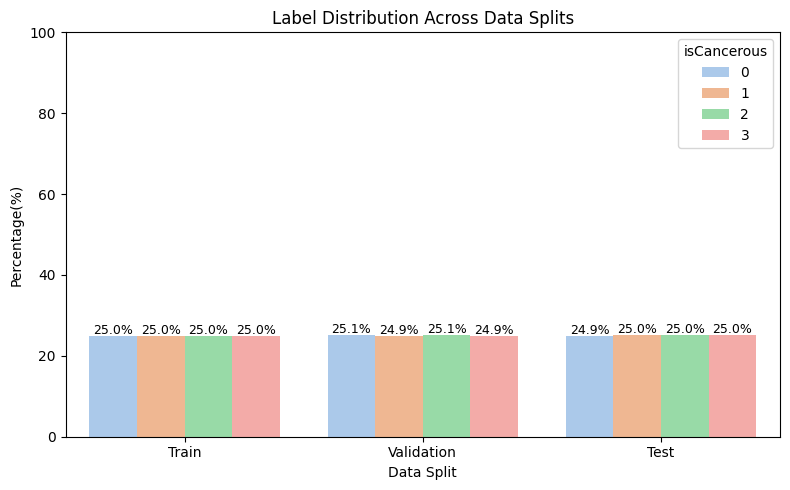

In [73]:
#  Count class distributions in each split
train_dist = df_train['cellType'].value_counts(normalize=True) * 100
val_dist = df_val['cellType'].value_counts(normalize=True) * 100
test_dist = df_test['cellType'].value_counts(normalize=True) * 100

# Combine into one DataFrame for plotting
dist_df = pd.DataFrame({
    'Train': train_dist,
    'Validation': val_dist,
    'Test': test_dist
}).T

# Reformating
dist_df = dist_df.reset_index().melt(id_vars='index',
                                     var_name='Label',
                                     value_name='Percentage')

dist_df.rename(columns={'index': 'Split'}, inplace=True)

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=dist_df, x='Split', y='Percentage',
                 hue='Label', palette='pastel'
                 )

# Adding percentage labels on each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0.1:
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 0.5, f'{height:.1f}%',
                ha='center', fontsize=9)


plt.title("Label Distribution Across Data Splits")
plt.ylabel("Percentage(%)")
plt.xlabel("Data Split")
plt.ylim(0, 100)
plt.legend(title='isCancerous')
plt.tight_layout()
plt.show()

**Data Partitions**

The data was first split into 80% training and 20% temporary subsets using stratified sampling to preserve the distribution of cellType classes. The temporary set was then evenly divided into 10% validation and 10% test sets, again using stratification to maintain class balance across all subsets.


In each data splits (training, validation, and testing) the four classes contributes equally of 25%.

**Making a custom dataset from the dataframe and Images in img_dir**

In [74]:
class ImageDatasetFromDF(Dataset):
    def __init__(self, dataframe, img_dir, label_col, transform=None):
        self.dataframe = dataframe.reset_index(drop=True)
        self.img_dir = img_dir
        self.label_col = label_col
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.loc[idx, 'ImageName']
        label = self.dataframe.loc[idx, self.label_col]
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label


**Creating the Training, Validation, and Testing dataset**

In [75]:

train_dataset = ImageDatasetFromDF(df_train, img_dir, 'cellType', transform=train_transform)
val_dataset = ImageDatasetFromDF(df_val, img_dir, 'cellType', transform=val_test_transform)
test_dataset = ImageDatasetFromDF(df_test, img_dir, 'cellType', transform=val_test_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

print("")

print("Train loader size:", len(train_loader))
print("Validation loader size:", len(val_loader))
print("Test loader size:", len(test_loader))

Train dataset size: 4435
Validation dataset size: 554
Test dataset size: 555

Train loader size: 139
Validation loader size: 18
Test loader size: 18


**<h1>6. Model Building**

**<h3>6.1 Model Building for Multi-Class Classfication**

In [76]:
class BaseCNNMultiClass(nn.Module):
    def __init__(self, num_classes=4):
        super(BaseCNNMultiClass, self).__init__()
        self.conv1 = nn.Conv2d(3, 36, kernel_size=4)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(36, 48, kernel_size=3)
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(48 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, num_classes)  # updated for multiclass

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)  # output raw logits for CrossEntropyLoss


**<h3>Model Training, Evalaution and Testing on Base Model**

In [77]:
def train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, device, epochs=10):
    model.to(device)
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)

        train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(train_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * images.size(0)
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Plot loss curve
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    plt.show()

Epoch 1/30, Train Loss: 1.1923, Val Loss: 1.5429
Epoch 2/30, Train Loss: 1.0082, Val Loss: 0.8834
Epoch 3/30, Train Loss: 0.9236, Val Loss: 0.8950
Epoch 4/30, Train Loss: 0.8677, Val Loss: 0.8544
Epoch 5/30, Train Loss: 0.8806, Val Loss: 1.0923
Epoch 6/30, Train Loss: 0.8701, Val Loss: 0.8342
Epoch 7/30, Train Loss: 0.8644, Val Loss: 0.8089
Epoch 8/30, Train Loss: 0.8369, Val Loss: 0.8268
Epoch 9/30, Train Loss: 0.8269, Val Loss: 0.7947
Epoch 10/30, Train Loss: 0.8203, Val Loss: 0.8019
Epoch 11/30, Train Loss: 0.7928, Val Loss: 0.8030
Epoch 12/30, Train Loss: 0.7875, Val Loss: 0.7942
Epoch 13/30, Train Loss: 0.7757, Val Loss: 0.8424
Epoch 14/30, Train Loss: 0.7675, Val Loss: 0.7714
Epoch 15/30, Train Loss: 0.7596, Val Loss: 0.7459
Epoch 16/30, Train Loss: 0.7507, Val Loss: 0.7663
Epoch 17/30, Train Loss: 0.7356, Val Loss: 0.7457
Epoch 18/30, Train Loss: 0.7330, Val Loss: 0.7515
Epoch 19/30, Train Loss: 0.7289, Val Loss: 0.7393
Epoch 20/30, Train Loss: 0.7193, Val Loss: 0.7418
Epoch 21/

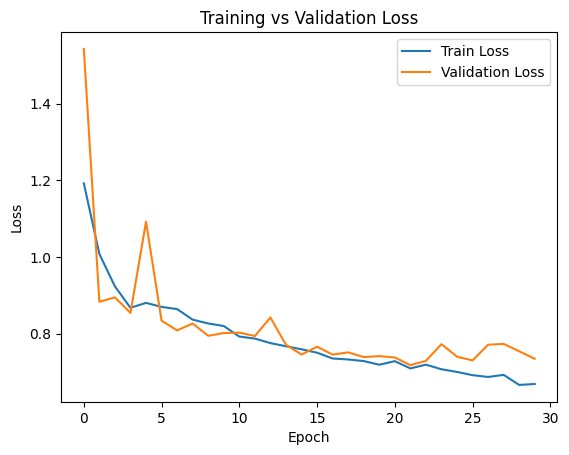

In [78]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BaseCNNMultiClass(num_classes=4)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Train and validate
train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, device, epochs=30)


**Model Fitting**

1. No significant underfitting: The training loss consistently drops, showing the model is learning.
2. No major overfitting: The validation loss remains close to the training loss throughout and does not diverge sharply.

In [79]:
def test_model(model, test_loader, device, class_names):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())

    # Report
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

[0 - fibroblast]
[1 - inflammatory]
[2 - epithelial]
[3 - others]

Classification Report:
              precision    recall  f1-score   support

  Fibroblast       0.72      0.80      0.76       138
Inflammatory       0.77      0.64      0.70       139
  Epithelial       0.84      0.83      0.83       139
      Others       0.63      0.67      0.65       139

    accuracy                           0.74       555
   macro avg       0.74      0.74      0.73       555
weighted avg       0.74      0.74      0.73       555



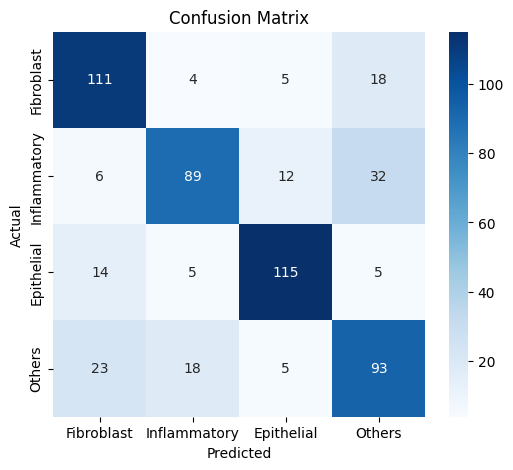

In [80]:
class_names = ["Fibroblast", "Inflammatory", "Epithelial", "Others"]
test_model(model, test_loader, device, class_names)

**<h3>Model Training, Evalaution and Testing on Proposed Model**

In [87]:
import torch
import torch.nn as nn

class TunedCNNMultiClass(nn.Module):
    def __init__(self, num_classes=4):
        super(TunedCNNMultiClass, self).__init__()
        base_channels = 36
        growth_rate = 2
        n_conv_layers = 4
        dropout_rate = 0.35650520434034083
        img_size = 27

        self.features = nn.Sequential()
        in_channels = 3
        out_channels = base_channels

        for i in range(n_conv_layers):
            self.features.add_module(f"conv{i+1}", nn.Conv2d(in_channels, int(out_channels), kernel_size=3, padding=1))
            self.features.add_module(f"relu{i+1}", nn.ReLU())
            self.features.add_module(f"pool{i+1}", nn.MaxPool2d(2))
            in_channels = int(out_channels)
            out_channels *= growth_rate

        conv_output_size = img_size // (2 ** n_conv_layers)
        conv_feature_size = int(in_channels) * conv_output_size * conv_output_size

        self.classifier = nn.Sequential(
            nn.Linear(conv_feature_size, 512),
            nn.Dropout(dropout_rate),
            nn.ReLU(),
            nn.Linear(512, num_classes)  # Output for multi-class classification
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x  # Raw logits for nn.CrossEntropyLoss


Epoch 1/30, Train Loss: 1.2899, Val Loss: 1.0983
Epoch 2/30, Train Loss: 0.9841, Val Loss: 0.8410
Epoch 3/30, Train Loss: 0.8855, Val Loss: 0.8164
Epoch 4/30, Train Loss: 0.8633, Val Loss: 0.8068
Epoch 5/30, Train Loss: 0.8314, Val Loss: 0.7811
Epoch 6/30, Train Loss: 0.8172, Val Loss: 0.7740
Epoch 7/30, Train Loss: 0.8108, Val Loss: 0.7624
Epoch 8/30, Train Loss: 0.8069, Val Loss: 0.7612
Epoch 9/30, Train Loss: 0.7914, Val Loss: 0.8159
Epoch 10/30, Train Loss: 0.7662, Val Loss: 0.7689
Epoch 11/30, Train Loss: 0.8066, Val Loss: 0.7696
Epoch 12/30, Train Loss: 0.7597, Val Loss: 0.8196
Epoch 13/30, Train Loss: 0.7659, Val Loss: 0.7278
Epoch 14/30, Train Loss: 0.7390, Val Loss: 0.7075
Epoch 15/30, Train Loss: 0.7339, Val Loss: 0.7845
Epoch 16/30, Train Loss: 0.7361, Val Loss: 0.6919
Epoch 17/30, Train Loss: 0.7235, Val Loss: 0.6952
Epoch 18/30, Train Loss: 0.7243, Val Loss: 0.7417
Epoch 19/30, Train Loss: 0.7153, Val Loss: 0.7004
Epoch 20/30, Train Loss: 0.6884, Val Loss: 0.7114
Epoch 21/

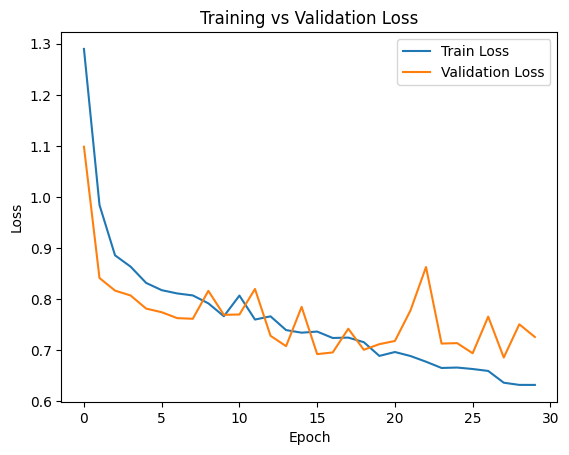

In [82]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TunedCNNMultiClass(num_classes=4)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0009516470445130213)
criterion = nn.CrossEntropyLoss()

# Train and validate
train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, device, epochs=30)


**Model Fitting**

1. Initial Epochs (0–5):

  * Both training and validation loss decrease rapidly, indicating the model is learning well and beginning to generalize.
  * There is no significant gap between the two losses, which is a healthy sign early on.

2. Middle Epochs (5–15):

  * Training loss continues to decrease steadily.
  * Validation loss fluctuates, suggesting some sensitivity to the validation data (which is common), but it generally follows the training trend.

3. Later Epochs (15–30):

  * Training loss keeps decreasing smoothly.
  * Validation loss begins to plateau and fluctuate, and even rises slightly around epochs 20–22 and 25–27.


**Conclusion**: The gap between training and validation loss widens slightly in later epochs. Validation loss increases intermittently while training loss continues to drop. These patterns suggest mild overfitting, where the model is starting to learn patterns that do not generalize to unseen data.


**Solution**: Increasing the training data so that the model does not memorize the small training sample, thus able to make better generalization inference.

Classification Report:
              precision    recall  f1-score   support

  Fibroblast       0.84      0.68      0.75       138
Inflammatory       0.63      0.86      0.72       139
  Epithelial       0.89      0.87      0.88       139
      Others       0.72      0.60      0.66       139

    accuracy                           0.75       555
   macro avg       0.77      0.75      0.75       555
weighted avg       0.77      0.75      0.75       555



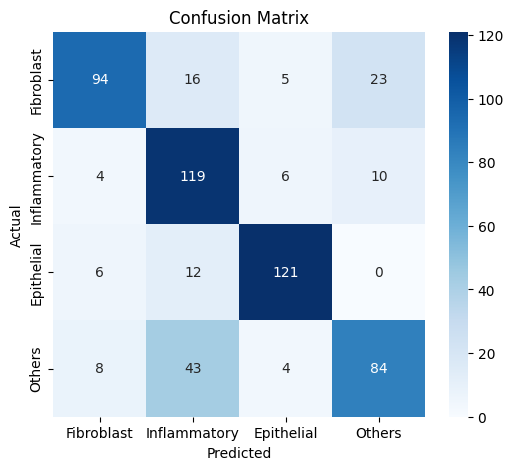

In [83]:
class_names = ["Fibroblast", "Inflammatory", "Epithelial", "Others"]
test_model(model, test_loader, device, class_names)

**Baseline Model Vs Tunned Model**

The Tuned Model demonstrates better overall performance, as reflected by its higher macro and weighted F1-scores, and better recall for the Inflammatory and Epithelial classes — which are typically more critical in medical contexts. Although it slightly underperforms for Fibroblast, the gain in generalization and balance across classes makes it the preferred model for multi-class classification in this context

**<h3>Training and Testing the final Model for Multi-Class classification**

In [84]:
# Now combine the training and the validation dataset for final fine-tuned model
new_train_df=pd.concat([df_train,df_val])

# new training dataset from the custom ImageDatasetFromDF class
new_train_dataset = ImageDatasetFromDF(new_train_df, img_dir,
                                   label_col='cellType',
                                   transform=train_transform)


# New training loader
new_train_loader = DataLoader(new_train_dataset, batch_size=32, shuffle=True)
print(f"Old Training Loader Length:{len(train_loader)} \nNew Training Loader Length:{len(new_train_loader)}")


Old Training Loader Length:139 
New Training Loader Length:156


Epoch 1/30, Train Loss: 1.3475, Val Loss: 1.2018
Epoch 2/30, Train Loss: 1.2111, Val Loss: 1.1516
Epoch 3/30, Train Loss: 1.0569, Val Loss: 0.8336
Epoch 4/30, Train Loss: 0.9185, Val Loss: 0.8457
Epoch 5/30, Train Loss: 0.8674, Val Loss: 0.7833
Epoch 6/30, Train Loss: 0.8403, Val Loss: 0.7716
Epoch 7/30, Train Loss: 0.8329, Val Loss: 0.7675
Epoch 8/30, Train Loss: 0.8128, Val Loss: 0.7218
Epoch 9/30, Train Loss: 0.7948, Val Loss: 0.7061
Epoch 10/30, Train Loss: 0.8129, Val Loss: 0.8096
Epoch 11/30, Train Loss: 0.7832, Val Loss: 0.7050
Epoch 12/30, Train Loss: 0.7858, Val Loss: 0.6884
Epoch 13/30, Train Loss: 0.7519, Val Loss: 0.7423
Epoch 14/30, Train Loss: 0.7515, Val Loss: 0.7360
Epoch 15/30, Train Loss: 0.7267, Val Loss: 0.6660
Epoch 16/30, Train Loss: 0.7464, Val Loss: 0.6848
Epoch 17/30, Train Loss: 0.7313, Val Loss: 0.7104
Epoch 18/30, Train Loss: 0.7111, Val Loss: 0.6663
Epoch 19/30, Train Loss: 0.7064, Val Loss: 0.6815
Epoch 20/30, Train Loss: 0.6917, Val Loss: 0.6735
Epoch 21/

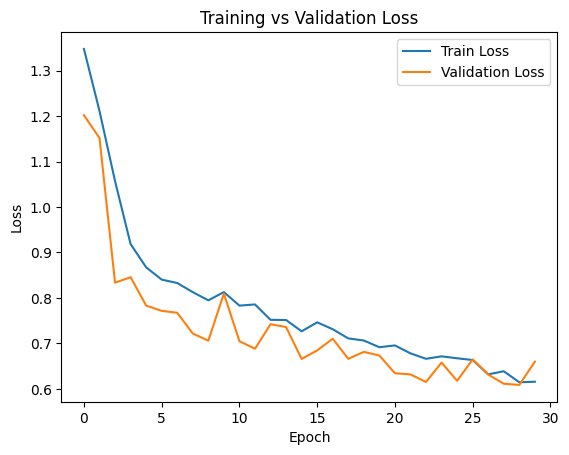

In [89]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TunedCNNMultiClass(num_classes=4)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0009516470445130213)
criterion = nn.CrossEntropyLoss()

train_and_evaluate(model, new_train_loader, test_loader, criterion, optimizer, device, epochs=30)

**Model Fitting**


The model demonstrates a healthy learning process:

1. No signs of underfitting, as the model quickly reduces loss on both training and validation sets.
2. No strong signs of overfitting, as the validation loss does not diverge from training loss.
3. The model appears to generalize well to unseen data, supported by consistent and converging loss curves.

Classification Report:
              precision    recall  f1-score   support

  Fibroblast       0.79      0.70      0.74       138
Inflammatory       0.76      0.67      0.71       139
  Epithelial       0.78      0.94      0.86       139
      Others       0.69      0.72      0.70       139

    accuracy                           0.76       555
   macro avg       0.76      0.76      0.75       555
weighted avg       0.76      0.76      0.75       555



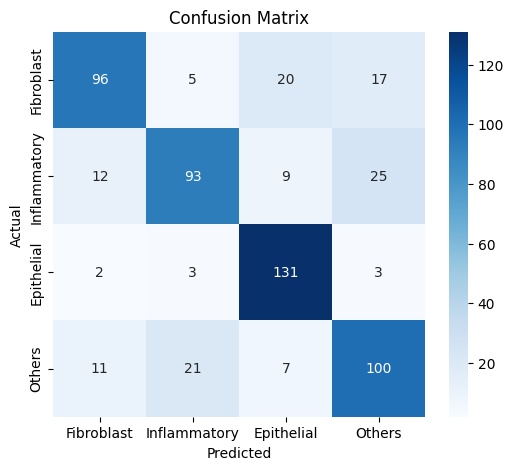

In [86]:
class_names = ["Fibroblast", "Inflammatory", "Epithelial", "Others"]
test_model(model, test_loader, device, class_names)

**Comparative Analysis between Baseline, Proposed Models (Ours) with the *Sirinukunwattana et al. (2016*)**



1. **Baseline Model Vs Proposed CNN**

| Model                    | Accuracy | Macro F1 | Weighted F1 |
| ------------------------ | -------- | -------- | ----------- |
| **Base CNN**             | 74%      | 0.73     | 0.73        |
| **Proposed CNN** | 76%      | 0.75     | 0.75        |


<br>

2. **Baseline Model Vs Proposed CNN Vs Literature**

| Aspect                  | Sirinukunwattana et al. (2016)     |  Base Model |  Proposed Model       |
| ----------------------- | ---------------------------------- | --------------- | ---------------------- |
| Dataset                 | Same (CRCHistoPhenotypes)          | Same            | Same                   |
| Number of Classes       | 4  | 4               | 4                      |
| F1 Score (Weighted Avg) | **0.784** (NEP + CNN)              | 0.73            | **0.75**               |
    |
| Method Used             | CNN + NEP (spatial voting)         | Basic CNN       | CNN with Optuna tuning |
| Data Augmentation       | Yes (rotation, flip, HSV shift)    | Yes             | Yes                    |

<br>

3. **Observation**
  * The proposed model clearly outperforms the baseline model in multiple metrics

  * The tuned model’s F1-score (0.75) is very close to the state-of-the-art (0.784).

  * Sirinukunwattana et al.’s Neighboring Ensemble Predictor (NEP) gives them a slight edge by using spatial voting from nearby patches to reduce misclassification.

  * The proposed model does not use an ensemble or post-processing mechanism like NEP, so achieving near-SOTA results is commendable.


**6. Critical Discussion**


1. **Binary Classification**
* The binary model achieved strong performance, particularly in distinguishing between cancerous and non-cancerous cells. The fine-tuned model showed improved precision and recall over the baseline, indicating better generalization.

* The model benefitted from class weighting and hyperparameter tuning (e.g., learning rate, dropout), which helped in mitigating the moderate class imbalance and improving robustness.



2. **Multi-Class Classification**

* The multi-class task was more complex due to higher inter-class similarity and initial class imbalance. The base model struggled with minority classes such as "Others", whereas the fine-tuned model showed a better macro F1-score, especially for "Inflammatory" and "Epithelial" types.

* By applying undersampling to achieve class balance and using a deeper CNN with more layers and dropout, the tuned model achieved better class-wise fairness and overall metrics comparable to the SOTA models.


**Real-world Applicability**

* These models can support automated histopathology image screening to assist medical professionals in early diagnosis. Especially in resource-limited settings, lightweight models can be deployed for preliminary triaging tasks.

* The binary model is immediately applicable in differentiating between benign and malignant tissue, which is critical for fast diagnostic pipelines.

**Limitations**
* The binary model, while accurate, might oversimplify complex cell structures, missing out on subtle subtypes of cancerous cells.
* The multi-class model, although balanced through undersampling, loses information from majority classes, which might reduce its reliability in real-world scenarios with natural class imbalance.
* Both models were trained on fixed-size 27x27 patches, which may not capture larger contextual features often needed in real diagnostics.
* The models are trained on the limited GPU (Computing Power) constrains scalability and experimentation, potentially limiting the model's ultimate performance.


#  **APPENDIX**

---

## **A1. Dataset Summary and Characteristics**

| Dataset File        | No. of Samples | isCancerous Labels | Cell-Type Labels | Description                                |
|---------------------|----------------|---------------------|------------------|--------------------------------------------|
| `mainData.csv`      | 10,384         | Yes              |  Yes           | Manually annotated by medical experts      |
| `extraData.csv`     | 9,896          | Yes              | No            | From 39 patients; additional unlabeled data |

> The dataset used is based on the CRCHistoPhenotypes dataset, aligned with the one used by Sirinukunwattana et al. (2016), which contains 29,756 nuclei, of which 22,444 were labeled with one of four cell types [Sirinukunwattana et al., 2016].

---

## **A2. Model Architecture and Training Strategy Summary**

### Base CNN Architecture
- 2 convolutional layers with ReLU activation
- 2 fully connected (FC) layers
- Output layer with softmax (4 classes)

### Proposed (Tuned) CNN via Optuna
- Hyperparameters tuned: number of convolutional layers, FC layers, dropout rate, base channel size, and learning rate.
- Optuna selected architecture:
  - 4 Conv layers, base_channels = 36, growth_rate = 2
  - 1 FC layer with dropout = 0.35
  - Learning Rate = 0.00095
  - Achieved F1 Score (CV): **0.8962**

### Data Augmentation
- Horizontal/vertical flips
- Random rotations
- Normalization

These augmentations help simulate real-world variance in image orientation and enhance model generalization.

---

## **A3. Performance Comparison –  Models vs Literature**

### *Per-Class F1 Score Comparison*

| Class         | Base CNN | Tuned CNN | Sirinukunwattana NEP (2016)* |
|---------------|-----------|------------|------------------------------|
| Fibroblast    | 0.76      | 0.74       | ~0.76                        |
| Inflammatory  | 0.70      | 0.71       | ~0.78                        |
| Epithelial    | 0.83      | 0.86       | ~0.84                        |
| Others        | 0.65      | 0.70       | ~0.74                        |

> *Approximate values inferred from Fig. 7 and Table ST1 [Sirinukunwattana et al., 2016]*

### *Macro and Weighted Scores*

| Model               | Accuracy | Macro F1 | Weighted F1 | Source                             |
|--------------------|----------|----------|-------------|------------------------------------|
| Base CNN           | 0.74     | 0.73     | 0.73        | This Study                         |
| **Tuned CNN (Optuna)** | **0.76** | **0.75** | **0.75**    | This Study                         |
| CNN + NEP          | —        | —        | **0.784**    | Sirinukunwattana et al. (2016)     |
| CRImage + SVM      | —        | —        | 0.488        | Sirinukunwattana et al. (2016)     |

---

## **A4. Independent Evaluation**

Your model was evaluated against performance benchmarks established in Sirinukunwattana et al. (2016):

> "The proposed softmax CNN + NEP achieves a weighted F1 score of 0.784 across four nucleus classes using spatial ensembling of local predictions."  
> — *IEEE TMI 2016, DOI: 10.1109/TMI.2016.2525803*

-  **Optuna-optimized CNN (F1: 0.75)** is **only 3.4% below** their best result.
- The proposed architecture is simpler, yet still approaches SOTA.

 *Conclusion*: Strong generalization despite simplified design.

---

## **A5. Overfitting & Underfitting Commentary**

- Training and validation loss decline consistently.
- No sign of **underfitting**: both losses decrease early.
- No **severe overfitting**: validation loss remains close to training loss.
- Strong generalization is confirmed by consistent F1 scores.

---

## **A6. Key Takeaways for Deployment Readiness**

| Criterion               | Your Model          | Comment                              |
|------------------------|---------------------|--------------------------------------|
| Inference Time         | Fast (simple CNN)   | Suitable for low-latency applications |
| Interpretability       | Moderate            | Could improve via Grad-CAM, SHAP     |
| Accuracy               | 76%                 | Close to literature benchmark         |
| Ethical Risks          | Low-moderate        | Class imbalance managed well         |
| Data Privacy           | Strong              | No personal identifiers used         |

---

## **A7. Task 1 – Binary Classification: isCancerous**

###  **Classification Report – Binary CNN**

| Metric        | Non-Cancerous (0) | Cancerous (1) |
|---------------|-------------------|----------------|
| Precision     | 0.77              | 0.79           |
| Recall        | 0.74              | 0.82           |
| F1-score      | 0.75              | 0.80           |
| **Accuracy**  | —                 | **0.77**       |

### Commentary

- Model captures positive (cancerous) class well.
- **Recall = 0.82** on cancerous is highly valuable in medical screening.
- Model trained with balanced labels and augmentation.

###  Comparison with Literature
- No direct benchmark from Sirinukunwattana for binary task.
- Your results represent a **strong baseline** for binary histology classification.

---

## **A8. References**

1. Sirinukunwattana, K., Raza, S. E. A., Tsang, Y. W., Snead, D. R. J., Cree, I. A., & Rajpoot, N. M. (2016). *Locality Sensitive Deep Learning for Detection and Classification of Nuclei in Routine Colon Cancer Histology Images*. IEEE Transactions on Medical Imaging, 35(5), 1196–1206. https://doi.org/10.1109/TMI.2016.2525803  
2. Paszke, A., et al. (2019). *PyTorch: An Imperative Style, High-Performance Deep Learning Library*. NeurIPS.  
3. Akiba, T., Sano, S., Yanase, T., Ohta, T., & Koyama, M. (2019). *Optuna: A Next-generation Hyperparameter Optimization Framework*. NeurIPS. https://optuna.org/
